### KDT
#### 1. Python 데이터분석: 예측모델 개발

- 강사: 최가람, 천재교육 AI센터 데이터기획분석팀원
- 주요 업무: 이탈 예측, 추천 (도서, 콘텐츠) 모델 개발 및 운영, 데이터 분석 업무

- 일정: 2023.8.07 ~ 8.08
<p>

- 교육내용
    - <b>이탈 예측 모델 개념 및 활용 데이터 설명</b>
    - <b>데이터 전처리 모듈 개발</b>
    - <b>분석 모델링 개발 실습 1 (Logistic Regression, LGBM)</b>
    - 분석 모델링 개발 실습 2 (Logistic Regression, LGBM)
    - 성능 지표 개념 (Confusion Matrix)
    - 모델 성능 결과 분석
    - 모델 최적화
<p>

- 교육목표
    - 온라인 교육 서비스를 이용하고 있는 유저들의 이력을 바탕으로 이탈 여부를 예측할 수 있는 모델을 개발해보자
    - 통합학년 이탈 예측 모델 구성
    - 학년 별 이탈 예측 모델 구성
    - 구매/재구매 별 이탈 예측 모델 구성
    - 과제) 이탈 예측 모델 개발: 활용 데이터 간략 설명, 예측 모델(logistic, DCT, Xgboost, LGBM 등등) 구성, ** 성능 지표를 통한 결과 설명 **

#### 2. 이탈예측 데이터 분석

In [1]:
# 데이터 읽어오기
# 파일명: churn_data.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
churn = pd.read_csv('./data/churn_data.csv', encoding = 'cp949')

In [3]:
len(churn)

60000

In [4]:
churn = churn.fillna(0)

churn = churn.drop(columns=['number'])

In [5]:
churn.columns

Index(['system_id', 'grade_sect_cd', 'mbr_sex_cd', 'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt', 'acmlt_bilclct_amt', 'correct_rate_avg',
       'learning_time_avg', 'media_action_cnt_sum', 'non_video_viewed_cnt_sum',
       'get_mm_point_sum', 'label', 're_purch'],
      dtype='object')

In [6]:
churn["re_purch"] = churn["re_purch"].astype(int)

In [7]:
# 데이터 기본 확인 (전체 레코드 수, 컬럼명 등)

컬럼 설명

- system_id	: system 상 id
- grade_sect_cd	: 학년 (1~6학년)
- mbr_sex_cd : 성별
- tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
- acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
- acmlt_bilclct_amt	: 누적 수금액
- correct_rate_avg	: 당월 획득 점수 평균
- learning_time_avg	: 당월 학습 시간 평균
- media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합)
- non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수
- get_mm_point_sum : 당월 획득 포인트 합 (사용 x)
- label	: 이탈, 미이탈 여부 (0 - 미이탈, 1 - 이탈)
- re_purch : 구매, 재구매 여부 (False - 신규, True - 재구매)

In [8]:
# 컬럼 별 값 확인 (범주형)
# 학년, 성별, label, re_purch
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system_id                 60000 non-null  object 
 1   grade_sect_cd             60000 non-null  object 
 2   mbr_sex_cd                60000 non-null  object 
 3   tmon_pchrg_lrn_dcnt       60000 non-null  float64
 4   acmlt_pchrg_lrn_dcnt      60000 non-null  float64
 5   acmlt_bilclct_amt         60000 non-null  float64
 6   correct_rate_avg          60000 non-null  float64
 7   learning_time_avg         60000 non-null  float64
 8   media_action_cnt_sum      60000 non-null  float64
 9   non_video_viewed_cnt_sum  60000 non-null  float64
 10  get_mm_point_sum          60000 non-null  float64
 11  label                     60000 non-null  int64  
 12  re_purch                  60000 non-null  int32  
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 5.

In [9]:
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn['grade'] = churn['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,1,6
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,1,6
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,0,6
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,1,6


In [10]:
# 컬럼 별 값 확인 (수치형)

In [ ]:
import seaborn as sns
sns.countplot(data = churn, x = 'grade', hue = 're_purch')
plt.xticks(ticks = [0,1,2,3,4,5], labels = ['1', '2', '3' ,'4', '5', '6'])
plt.ylabel('학생 수')
plt.title('학년 별 구매, 재구매 여부')
plt.show()

In [ ]:
# 전반적인 분포도 확인
import matplotlib.pyplot as plt
#당월 유료학습일 수
plt.hist(churn['tmon_pchrg_lrn_dcnt'], bins = 5)
plt.show()

In [ ]:
# 누적 유료학습일 수
plt.hist(churn['acmlt_pchrg_lrn_dcnt'], bins = 50)
plt.show()

In [ ]:
#누적 수금액
acm_bil  = churn['acmlt_bilclct_amt'].apply(lambda x: int(float(x)))
plt.hist(churn['acmlt_bilclct_amt'], bins=100)
plt.ticklabel_format(axis='x', style='plain', useOffset=False)
plt.show()

#### 3. 이탈예측 모델

[데이터 - 컨셉]
- 결과 : 이탈 or 미이탈
- 학년 이력 : 전체 학년 통합 or 학년 별 분리
- 구매, 재구매 이력: Feature 사용 or 모델 분리
- 성별 이력 등등..

[모델]
- 데이터 처리 : DB 사용 -> SQL 처리
- 모델 구현 (Logistic Regression, LGBM)
- 실행부
- 최적화 (Optimizing)

##### 3-1 데이터 전처리

In [15]:
# 데이터 읽어오기
churn_df = pd.read_csv('./data/churn_data.csv')
churn_df = churn_df.fillna(0)
churn_df = churn_df.drop(columns= ['number'])
churn_df["re_purch"] = churn_df["re_purch"].astype(int)

In [16]:
# 학습 데이터, 레이블 (label) 분리
from sklearn.model_selection import train_test_split
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_df['grade'] = churn_df['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_df.head()

# 필요 컬럼만 가져오기 (X : 학습 데이터, y: 레이블)

# - grade_sect_cd: 학년 (1~6학년)
# - tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
# - acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
# - acmlt_bilclct_amt: 누적 수금액
# - correct_rate_avg: 당월 획득 점수 평균
# - learning_time_avg: 당월 학습 시간 평균
# - media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합)
# - non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합)
# - get_mm_point_sum : 당월 획득 포인트 합 (사용 x)

X = churn_df[['grade','re_purch',
'tmon_pchrg_lrn_dcnt', 
'acmlt_pchrg_lrn_dcnt', 
'acmlt_bilclct_amt', 
'correct_rate_avg',
'learning_time_avg',
'media_action_cnt_sum', 
'non_video_viewed_cnt_sum',
'get_mm_point_sum']]

y = churn_df['label']



In [17]:
churn_df.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1


In [ ]:
# Train, Test 데이터 분리 (이탈 미이탈 값 확인)
from sklearn.model_selection import train_test_split

target=churn_df['re_purch']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=target)

print('[Train] 전체 : {}, 이탈 : {}, 미이탈 : {}'.format(len(X_train), y_train[y_train == 1].shape[0], y_train[y_train==0].shape[0]))
print('[Test] 전체 : {}, 이탈 : {}, 미이탈 : {}'.format(len(X_test), y_test[y_test == 1].shape[0], y_test[y_test==0].shape[0]))



##### 3-2 Logistic regression 모델

In [19]:
from sklearn.linear_model import LogisticRegression
# Logistic 모델 학습
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

C:\Users\big-03-06\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [20]:
# 예측 및 결과
y_pred = log_model.predict(X_test)
y_pred = list(y_pred)
print('[Predict] 이탈 : {}, 미이탈 : {}'.format(y_pred.count(1), y_pred.count(0)))

[Predict] 이탈 : 47, 미이탈 : 11953


In [21]:
# 예측 데이터와 실제 데이터의 차이 살펴보기 (True or False)
log_model.score(X_train, y_train)

0.9821875

In [22]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9815833333333334

In [23]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.2127659574468085, 0.05154639175257732, 0.08298755186721991, None)

##### 3-3 LGBM 모델

In [24]:
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=target)

In [25]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=0)
lgbm_model.fit(X_train, y_train)
# 예측 결과
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print('[Predict] 이탈 : {}, 미이탈 : {}'.format(y_pred.count(1), y_pred.count(0)))

[LightGBM] [Info] Number of positive: 738, number of negative: 47262
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015375 -> initscore=-4.159518
[LightGBM] [Info] Start training from score -4.159518
[Predict] 이탈 : 181, 미이탈 : 11819


In [26]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9950833333333333

In [27]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8729281767955801, 0.8144329896907216, 0.8426666666666666, None)

In [28]:
# Logistic LGBM precision, recall, f1 score 비교

In [ ]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))
plot_importance(lgbm_model, ax=ax)

### 학년별 이탈 예측 모델을 구성해본 뒤, 성능 결과를 확인해 보자

In [30]:
# 데이터 읽어오기
import pandas as pd
churn_data = pd.read_csv('./data/churn_data.csv')
churn_data = churn_data.fillna(0)
churn_data = churn_data.drop(columns= ['number'])
churn_data["re_purch"] = churn_data["re_purch"].astype(int)
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0


In [31]:
# 학년 치환 (숫자로)
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import koreanize_matplotlib
from imblearn.over_sampling import SMOTE
import sklearn

In [33]:
# 모델 구성
def churn_model(grade_df, grade_name='6'):
    
    X = grade_df[['re_purch', 'tmon_pchrg_lrn_dcnt', 'acmlt_pchrg_lrn_dcnt', 'acmlt_bilclct_amt', 'correct_rate_avg','learning_time_avg','media_action_cnt_sum', 'non_video_viewed_cnt_sum','get_mm_point_sum']]
    y = grade_df['label']

    #Train, Test 데이터 분리(이탈, 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X_train, y_train)
    
    print('[Train] {} 학년, 이탈 : {}, 미이탈 : {}'.format(grade_name, len(X_train), y_train[y_train == 1].shape[0], y_train[y_train==0].shape[0]))
    print('[Test] {} 학년, 이탈 : {}, 미이탈 : {}'.format(grade_name,len(X_test), y_test[y_test == 1].shape[0], y_test[y_test==0].shape[0]))
    

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    
    
    # 예측결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print('[Predict] {} 학년, 이탈 : {}, 미이탈 : {}'.format(grade_name, y_pred.count(1), y_pred.count(0)))
    
    #Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    print("{} 학년, acc: {}, precision: {}, recall: {}, f1: {}".format(grade_name, acc, pre, re, f1))
    
    fig, ax = plt.subplots(figsize=(5,5))
    plot_importance(lgbm_model, ax=ax)
    plt.title('{} 학년 Feature Importance'.format(grade_name))
    plt.show()
    return

In [ ]:
# 실행부 구성
for grade in range(1,7):
    grade_df=churn_data[churn_data['grade'] == grade]
    churn_model(grade_df, grade_name = str(grade))

#### 4. 성능 지표 (Confusion Matrix) : Precision, Recall, F1 score

In [35]:
# 데이터 읽어오기
import pandas as pd
churn_data= pd.read_csv('./data/churn_data.csv')
churn_data = churn_data.fillna(0)
churn_data = churn_data.drop(columns= ['number'])
churn_data["re_purch"] = churn_data["re_purch"].astype(int)
# 학년 치환 (숫자로)
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1


In [36]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [37]:
# 예측
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print('[Predict] 이탈 : {}, 미이탈 : {}'.format(y_pred.count(1), y_pred.count(0)))

[Predict] 이탈 : 181, 미이탈 : 11819


In [38]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9950833333333333

In [39]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8729281767955801, 0.8144329896907216, 0.8426666666666666, None)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11783,    23],
       [   36,   158]], dtype=int64)

In [43]:
# cmtx 구성
cmtx = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = [1, 0]), index = ['실제: 이탈(1)', '실제: 미이탈(0)'],
                   columns = ['예측: 이탈 (1)', '예측: 미이탈(0)'])
cmtx

,예측: 이탈 (1),예측: 미이탈(0)
실제: 이탈(1),158,36
실제: 미이탈(0),23,11783


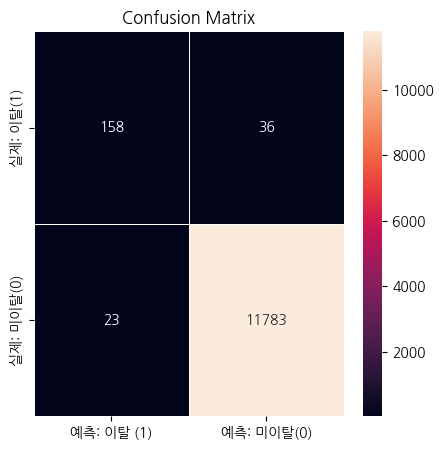

In [44]:
# cmtx 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 한글 폰트 안 깨지고 사용 가능
# pip install koreanize-matplotlib

plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cmtx, annot=True, fmt='.0f', linewidth=.5)
plt.show()


In [45]:
# Precision
from sklearn.metrics import precision_score, recall_score, f1_score

# TP / (TP+FP)
precision = cmtx.iloc[0,0] / (cmtx.iloc[0,0]+cmtx.iloc[1,0])

# Recall
# TP /(TP+FN)
recall = cmtx.iloc[0,0] / (cmtx.iloc[0,0]+cmtx.iloc[0,1])
# F1 Score
# 2 * (Prescion * Recall)/(Presicion + Recall)
f1 = 2 * (precision*recall)/(precision+recall)
                           
                           
print('precision {}, recall {}, f1 {}'.format(precision, recall, f1))




precision 0.8729281767955801, recall 0.8144329896907216, f1 0.8426666666666666
